# Problemas Numéricos: Mecânica Newtoniana
## FIS0615 - Mecânica Clássica I
### Docente: Prof. Dr. Edimilson alguma coisa
### Discente: Assinem o nome de vcs, Ylana Karolina Santos Lopes
### 31/03/2025

### Índice:
- [1. Movimento horizontal de uma partícula sujeita a uma força variável no tempo.](#1.-Movimento-horizontal-de-uma-partícula-sujeita-a-uma-força-variável-no-tempo.)


- [2. Movimento vertical com resistência de uma partícula.](#2.-Movimento-vertical-com-resistência-de-uma-partícula.)

- [3. Comparativo do movimento vertical de um objeto caindo sob ação de uma força linear e uma força quadrática.](#3.-Comparativo-do-movimento-vertical-de-um-objeto-caindo-sob-ação-de-uma-força-linear-e-uma-força-quadrática.)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import cumtrapz


%matplotlib inline


### 1. Movimento horizontal de uma partícula sujeita a uma força variável no tempo.

**Enunciado:** Uma partícula de massa 𝑚=1 kg está sujeita a uma força unidimensional $𝐹(𝑡)=𝑘𝑡𝑒^{−𝛼𝑡}$, onde 𝑘=1 N/s e 𝛼=0.5 s−1. Se a partícula estiver inicialmente em repouso, calcule e elabore um gráfico da posição, velocidade e aceleração da partícula como função do tempo.

**Solução analítica:** Sabendo que $\vec F = m \vec a$, podemos isolar o $\vec a$ de forma que:
$$\vec a = \frac{\vec F}{m}$$

Assim, temos que a aceleração pode ser expressa por:


$$\vec a(t) = \frac{1}{m}𝑘𝑡𝑒^{−𝛼𝑡}. \tag{1}$$


Sabendo que $\vec a = d\vec v/ dt$

boe n faz sentido calcular tudo analiticamente

In [3]:
def f(t):
    return k*t*np.exp(-alpha*t)


t = np.linspace(0,10,50)
m = 1 # kg
k = 1 # N/s
alpha = 0.5 # s^-1
v0 = 0

a = f(t)/m # usando lei de newton f = ma

v_t = cumtrapz(a, t, initial=0)  # Velocidade
x_t = cumtrapz(v_t, t, initial=0)  # Posição


C:\Users\ylana\AppData\Local\Temp\ipykernel_1772\2556530891.py:13: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  v_t = cumtrapz(a, t, initial=0)  # Velocidade
C:\Users\ylana\AppData\Local\Temp\ipykernel_1772\2556530891.py:14: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  x_t = cumtrapz(v_t, t, initial=0)  # Posição


Text(0, 0.5, 'Aceleração $(m/s^2)$')

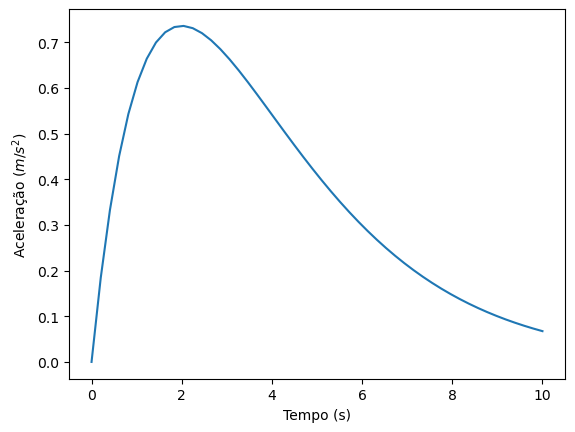

In [4]:
# aceleração
plt.plot(t, a)
plt.xlabel("Tempo (s)")
plt.ylabel(r"Aceleração $(m/s^2)$")

Text(0, 0.5, 'Velocidade (m/s)')

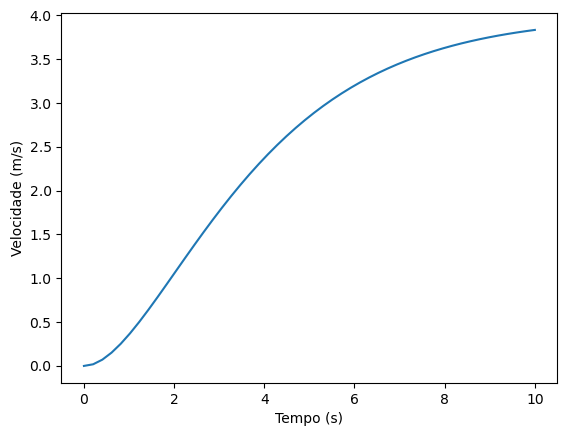

In [5]:
plt.plot(t, v_t)
plt.xlabel("Tempo (s)")
plt.ylabel(r"Velocidade (m/s)")

Text(0, 0.5, 'Posição (m)')

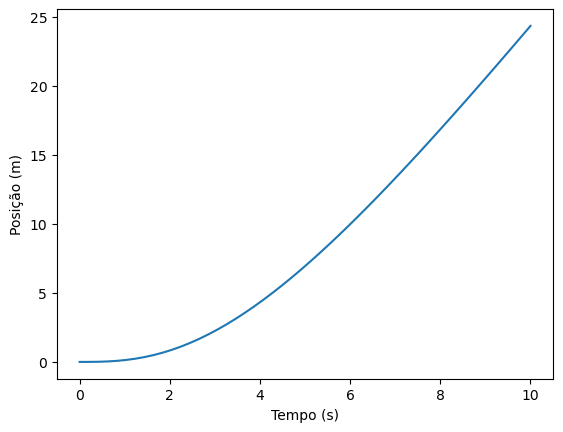

In [6]:
plt.plot(t, x_t)
plt.xlabel("Tempo (s)")
plt.ylabel(r"Posição (m)")

### 2. Movimento vertical com resistência de uma partícula.

**Enunciado:** Uma partícula de massa 𝑚 está submetida ao movimento vertical em um determinado meio com uma força de retardo proporcional a velocidade.

(a) Determine o deslocamento e a velocidade de movimento vertical da partícula.

(b) Elabore gráficos de 𝑦(𝑡) para $𝑣_0 = 0,|𝑣⃗_0|<|𝑣⃗_𝑡| e |𝑣⃗_0|>|𝑣⃗_𝑡|$, onde $𝑣⃗_𝑡$ é a velocidade terminal.

(c) Elabore gráficos de 𝑣(𝑡) para $𝑣_0 = 0,|𝑣⃗_0|<|𝑣⃗_𝑡| e |𝑣⃗_0|>|𝑣⃗_𝑡|$, onde $𝑣⃗_𝑡$ é a velocidade terminal.

**Solução analítica:** Considerando o movimento vertical com a única força atuando no corpo seja a gravitacional, temos a força de retardo e a gravitacional sendo:

$$F_r = - kv(t), \quad F_g = mg.$$
$$\vec F = m \vec a = mg - kmv.$$

Em que consideramos o sentido positivo como sendo para baixo. Assim, isolamos o $\vec a$ encontramos:

$$ \vec a (t) = g - kv \tag{1} $$

Como sabemos que $\vec a = d\vec v/dt$, podemos encontrar a equação diferencial da forma de (2):

$$ \frac{dv}{dt} = g - kv, $$
$$ \frac{dv}{dt} - kv = g. \tag{2}$$

Multiplicamos ambos os lados da equação, usando o fator de integração $\mu (t) = e^{\int kdt} = e^{kt}$ para encontrar uma forma que lembra a forma de uma regra do produto.

$$ \mu(t) \frac{dv}{dt} - \mu(t) kv = \mu(t) g.$$
$$\frac{d}{dt}(\mu \cdot v) = \mu g$$

Integrando dos dois lados em $t$:

$$\mu \cdot v = \int \mu(t) g dt = \int g e^{kt} dt$$ 

$$ v e^{kt} = \frac{g}{k} e^{kt} + C$$

Assim, encontramos a expressão para a velocidade. 

$$v(t) = \frac{g}{k} + Ce^{-kt}$$

Fazendo $t = 0$, podemos encontrar o valor de $C$:

$$v(0) = v_0 = \frac{g}{k} + C  ⟶  C = v_0 - \frac{g}{k}$$

De forma que encontramos a função da velocidade como sendo finalmente:

$$v(t) = \frac{g}{k} + (v_0 - \frac{g}{k})e^{-kt}$$


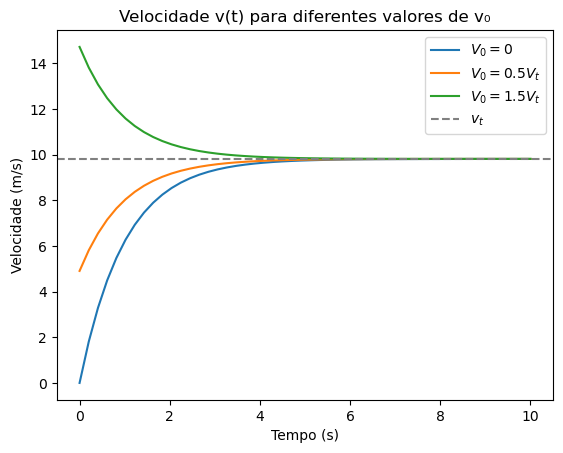

In [7]:
def v_func(t, v0):
    return g/k + (v0 - (g/k))*np.exp(-k*t)

g = 9.81 #m/s^2
k = 1 # Constante
vt = g/k  # quando consideramos o t tendendo ao infinito.

v0 = [0, 0.5*vt, 1.5 * vt]
label_list = [r'$V_0 = 0$', '$V_0 = 0.5 V_t$', '$V_0 = 1.5 V_t$']


for i in range(0,len(v0)):
    v = v_func(t, v0[i]) 
    plt.plot(t, v, label = label_list[i])
    
plt.axhline(vt, color='gray', linestyle='--', label=r"$v_t$")

plt.title("Velocidade v(t) para diferentes valores de v₀")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.legend()

### 3. Comparativo do movimento vertical de um objeto caindo sob ação de uma força linear e uma força quadrática.

(a) Faça gráficos comparativos da velocidade terminal do movimento vertical de queda para um objeto sob ação de uma força linear e uma força quadrática para as condições iniciais $𝑡_0=0$, $𝑥_0=0$ e $𝑣_0=0$. 

(b) Em determinado intervalo de tempo, qual objeto percorrerá uma distância maior, e por quê?

(c) Para os objetos que caem verticalmente, qual das duas situações é mais desejável e por quê?

(d) O que indicam os valores de 𝑣1 e 𝑣2 no tempo 𝑡 =20 e 30?

**Solução analítica:**

Vamos considerar $\vec F = -k \vec v$ (força linear) e $\vec F = -k \vec v^2$ (força quadrática). 

**(a)** Para o gráfico da força linear, usaremos o mesmo desenvolvimento apresentado na [questão 2](#2.-Movimento-vertical-com-resistência-de-uma-partícula.). Onde encontramos a função da velocidade como sendo:

$$v(t) = \frac{g}{k} + (v_0 - \frac{g}{k})e^{-kt}.$$


Com isso, podemos focar na equação de movimento da força quadrática. Fazendo um processo análogo ao da questão anterior:

$$F_r = - kv(t)^2, \quad F_g = mg.$$
$$\vec F = m \vec a = mg - kmv^2.$$

Em que consideramos o sentido positivo como sendo para baixo. Assim, isolamos o $\vec a$ encontramos:

$$ \vec a (t) = g - kv^2 \tag{1} $$

Como sabemos que $\vec a = d\vec v/dt$, podemos encontrar a equação diferencial da forma de (2):

$$ \frac{dv}{dt} = g - kv^2, $$
$$ \frac{dv}{dt} - kv^2 = g. \tag{2}$$

Aqui, podemos separar as variáveis dependentes de $v$ para um lado e as de $t$ para o outro de forma que temos:

$$\frac{dv}{g + kv^2} = dt$$

Integrando dos dois lados encontramos, em que chamamos $\alpha = k/g$:

$$\int \frac{dv}{g + kv^2} = \int dt$$

$$\frac{1}{g} \int \frac{dv}{1 + \alpha v^2} = \int dt$$

Com isso, vemos que a integral do termo da esquerda é uma integral tabelada que retorna:

$$\int \frac{dv}{1 + \alpha v^2} = \frac{1}{\alpha} \tanh^{-1}(\alpha v) + C$$

Substituindo na expressão anterior, temos que a solução 



Encontramos a solução final:

$$v(t) = \sqrt{\frac{mg}{k}} \tanh(\sqrt{\frac{kg}{m}} t)$$

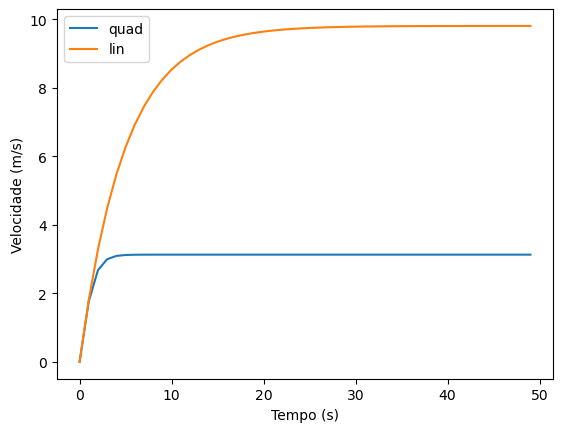

In [19]:
def v_lin(t, v0):
    return g/k + (v0 - (g/k))*np.exp(-k*t)

def v_quad(t):
    return np.sqrt((m * g) / k) * np.tanh(np.sqrt((k * g) / m) * t)  ## já considera v0 = 0


plt.plot(v_quad(t), label = "quad")
plt.plot(v_lin(t, 0), label = "lin")

plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.legend()